<font color=black size=5 face=arial>**Homework 4**</font>

a.	Compute the linear regression solution (i.e., best fit line) for this dataset. Use the entire dataset to train and find the best fit line. Give the expression for the best fit line and compute the error performance on the training dataset. Recall that the error performance is measured by the sum of squared errors. 

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data set
d=np.array([[0,394.33],[4,329.5],[8,291],[12,255.17],[16,229.33],[20,204.83],[24,179],[28,163.83],[32,150.33]])
n=len(d)

#simple linear regression model
Sxy=np.zeros(n)
Sxx=np.zeros(n)
x_mean=np.mean(d[:,0])
y_mean=np.mean(d[:,1])
for i in range(n):
    Sxy[i]=(d[i,0]-x_mean)*(d[i,1]-y_mean)
    Sxx[i]=(d[i,0]-x_mean)**2
S_xy=np.sum(Sxy)
S_xx=np.sum(Sxx)
k=S_xy/S_xx
b=y_mean-k*x_mean

x_tr = np.linspace(0, 35, 200)
y_tr = k*x_tr+b
print("The expression of fit line is y=%fx"%k+"+%f"%b)

The expression of fit line is y=-7.280625x+360.636667


In [3]:
# Error function
q=np.zeros(n)
for i in range(n):
    q[i]=(d[i,1]-(k*d[i,0]+b))**2
Q=np.sum(q)
mse=np.mean(q)
print("The error performance is %f"%Q+" MSE=%f"%mse)

The error performance is 2531.529425 MSE=281.281047


b.	Plot the best fit line over the data points and comment on whether the fit is good

The fit is not good enough


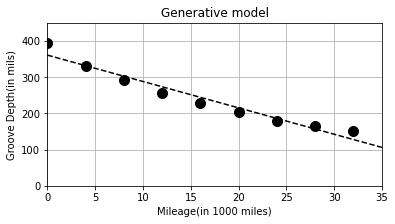

In [4]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(d[:,0], d[:,1], 'ok', ms=10)
ax.set_xlim(0, 35)
ax.set_ylim(0, 450)
ax.set_title('Generative model')
plt.xlabel("Mileage(in 1000 miles)")
plt.ylabel("Groove Depth(in mils)")
plt.grid()
print("The fit is not good enough")

c.	Leave out the last sample (x=32) and use it as a test data point. Use the remaining samples to train and find the best fit line. Give the expression for the best fit line. Compute the training error and the test error performance.

The expression of fit lin is y=-7.795928x+368.881515
The training MSE=228.813898
The test error is 955.933967


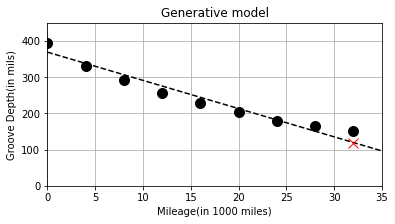

In [5]:
n=len(d)-1

#simple linear regression model
Sxy=np.zeros(n)
Sxx=np.zeros(n)
x_mean=np.mean(d[:,0])
y_mean=np.mean(d[:,1])
for i in range(n):
    Sxy[i]=(d[i,0]-x_mean)*(d[i,1]-y_mean)
    Sxx[i]=(d[i,0]-x_mean)**2
S_xy=np.sum(Sxy)
S_xx=np.sum(Sxx)
k1=S_xy/S_xx
b1=y_mean-k1*x_mean

x_tr = np.linspace(0, 35, 200)
y_tr1 = k1*x_tr+b1
print("The expression of fit lin is y=%fx"%k1+"+%f"%b1)

y_test=k1*d[8,0]+b1

# plot
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr1, '--k')
ax.plot(d[:,0], d[:,1], 'ok', ms=10)
ax.plot(d[8,0], y_test, 'xr', ms=10)
ax.set_xlim(0, 35)
ax.set_ylim(0, 450)
ax.set_title('Generative model')
plt.xlabel("Mileage(in 1000 miles)")
plt.ylabel("Groove Depth(in mils)")
plt.grid()

# Error function
q=np.zeros(n)
for i in range(n):
    q[i]=(d[i,1]-(k1*d[i,0]+b1))**2
Q=np.sum(q)
mse=np.mean(q)
q_test=(y_test-d[8,1])**2
print("The training MSE=%f"%mse+"\nThe test error is %f"%q_test)

d.	Using the entire dataset to train, find the linear regression solution using Scikit-learn and compare to the solution you got in part (a). The two solutions might be different. Can you explain why? Try doing this several times if the answers are the same.

The expression of fit line in a is y=-7.280625x+360.636667
Model Coefficients [slope, intercept]: [ -7.280625   360.63666667]


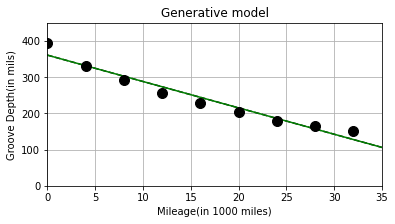

In [6]:
# We create the model.
lr = lm.LinearRegression()
x=d[:,0]
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], d[:,1])
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])

# print the coefficients of the two model
print("The expression of fit line in a is y=%fx"%k+"+%f"%b)
print('Model Coefficients [slope, intercept]:', np.append(lr.coef_, lr.intercept_))

# plot
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x_tr, y_lr, 'g')
ax.plot(d[:,0], d[:,1], 'ok', ms=10)
ax.set_xlim(0, 35)
ax.set_ylim(0, 450)
ax.set_title('Generative model')
plt.xlabel("Mileage(in 1000 miles)")
plt.ylabel("Groove Depth(in mils)")
plt.grid()

the coefficinets of two models are the same

try to replace linear model by svm

Model Coefficients [slope, intercept]: [ -8.24687043 394.74237203]
The score: 0.877256535882558


/Users/wanrylin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


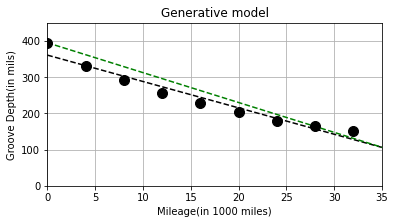

In [14]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
d=np.array([[0,394.33],[4,329.5],[8,291],[12,255.17],[16,229.33],[20,204.83],[24,179],[28,163.83],[32,150.33]])
x=d[:,0]
#sc=StandardScaler()
ls=LinearSVR(C=1e5)
#x_train=np.array(d[:,0]).reshape(-1,1)
#y_train=np.array(d[:,1]).reshape(-1,1)
#print(x_train,y_train)
#x_train=sc.fit_transform(x_train)
#y_train=sc.fit_transform(y_train)
ls.fit(x[:, np.newaxis], d[:,1])
y_ls = ls.predict(x_tr[:, np.newaxis])

print('Model Coefficients [slope, intercept]:', np.append(ls.coef_, ls.intercept_))
print('The score:', ls.score(x[:, np.newaxis], d[:,1]))

# plot
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x_tr, y_ls, '--g')
ax.plot(d[:,0], d[:,1], 'ok', ms=10)
ax.set_xlim(0, 35)
ax.set_ylim(0, 450)
ax.set_title('Generative model')
plt.xlabel("Mileage(in 1000 miles)")
plt.ylabel("Groove Depth(in mils)")
plt.grid()


After seting the C=1e5 the regression is shown above. The output of SVR may differ every time. Because the SVR relys on the gradient descent which can be stuck in a local optimum. The solution of SVR depends on the position of strating point. 